### Import

In [2]:
# import packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.pylab import date2num
from datetime import datetime, timedelta
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [1]:
# import data
dir_data = 'C:\\Users\\user\\Desktop\\MultiChart\\NI225_201911'
NI225_path = os.path.join(dir_data, 'EN_1M_MostActive.txt')
NI225 = pd.read_csv(NI225_path, engine='python')
NI225.dropna(how='any',inplace=True)
NI225.Date = pd.to_datetime(NI225.Date)
# Create Year & month & Return
NI225['Year'] = NI225['Date'].map(lambda x: x.year)
NI225['Month'] = NI225['Date'].map(lambda x: x.month)
NI225['Range'] = NI225['High'] - NI225['Low']
NI225['Diff'] = NI225['Close'] - NI225['Open']
NI225['Rotate'] = abs(NI225['Diff']) / NI225['Range']

NI225['Up_down'] = NI225['Diff'].map(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))
NI225['Return'] = ((NI225['Close'] - NI225['Open']) / NI225['Open'])*100
NI225['P_Return'] = ((NI225['High'] - NI225['Low']) / NI225['Low'])*100
# Sort NI225 by Date
NI225 = NI225.sort_values(by = ['Date', 'Time'])
Year_sorted = np.sort(NI225.Year.unique())
NI225.head()

NameError: name 'os' is not defined

In [4]:
# Split time
time = NI225['Time'].str.split(':', 2, expand = True)
NI225['Hour'] = time[0].astype(int)
NI225['Min'] = time[1].astype(int)
NI225.head()

,Date,Time,Open,High,Low,Close,Volume,Year,Month,Range,Diff,Rotate,Up_down,Return,P_Return,Hour,Min
0,2003-07-01,15:31,9275.0,9275.0,9270.0,9270.0,75,2003,7,5.0,-5.0,1.0,-1,-0.053908,0.053937,15,31
1,2003-07-01,15:32,9270.0,9270.0,9260.0,9265.0,37,2003,7,10.0,-5.0,0.5,-1,-0.053937,0.107991,15,32
2,2003-07-01,15:33,9260.0,9265.0,9260.0,9265.0,66,2003,7,5.0,5.0,1.0,1,0.053996,0.053996,15,33
3,2003-07-01,15:34,9265.0,9265.0,9265.0,9265.0,77,2003,7,0.0,0.0,NaN,-1,0.000000,0.000000,15,34
4,2003-07-01,15:35,9265.0,9265.0,9265.0,9265.0,45,2003,7,0.0,0.0,NaN,-1,0.000000,0.000000,15,35


### EDA

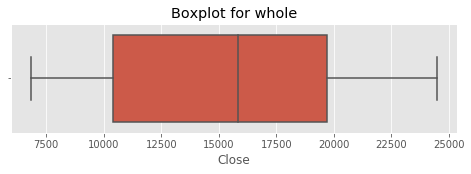

In [11]:
# Box plot for whole
plt.figure(figsize=(8,2))    
sns.boxplot(NI225.loc[:, 'Close'])
plt.title('Boxplot for whole')
plt.show()

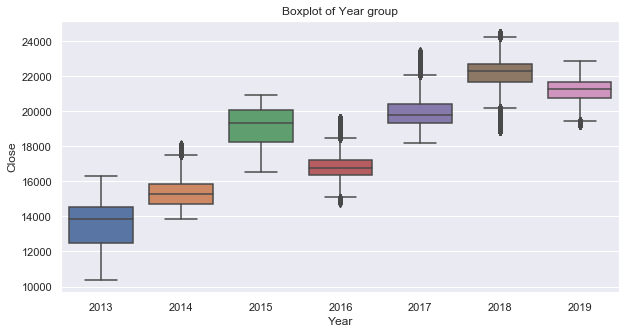

In [8]:
# Draw 6 Boxplots group by year
plt.figure(figsize=(10,5))
Year_mask = NI225['Year'] >= 2013
sns.boxplot(x='Year', y='Close', data=NI225[Year_mask])
plt.title('Boxplot of Year group')
plt.show()

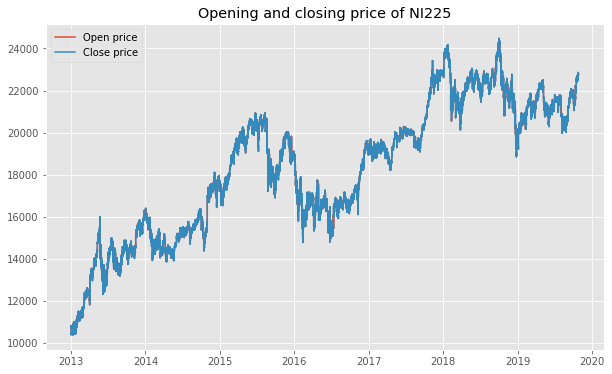

In [38]:
plt.figure(figsize=(10,6))
#plt.style.use('ggplot')
plt.title("Opening and closing price of NI225")
plt.plot(NI225.loc[Year_mask,'Date'], NI225.loc[Year_mask,'Open'], label='Open price')
plt.plot(NI225.loc[Year_mask,'Date'], NI225.loc[Year_mask,'Close'], label='Close price')
plt.legend(loc='upper left')
plt.show()

Text(0.5, 1.0, 'NI225 Return')

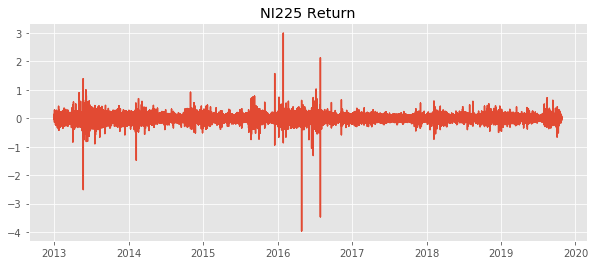

In [93]:
# Return 
plt.figure(figsize = (10,4))
plt.plot(NI225.loc[Year_mask,'Date'],NI225.loc[Year_mask,'Return'])
plt.title('NI225 Return')

Text(0.5, 1.0, 'NI225 P_Return')

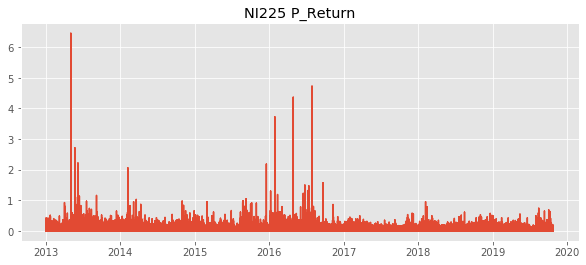

In [90]:
# Return 
plt.figure(figsize = (10,4))
plt.plot(NI225.loc[Year_mask,'Date']NI225.loc[Year_mask,'P_Return'])
plt.title('NI225 P_Return')

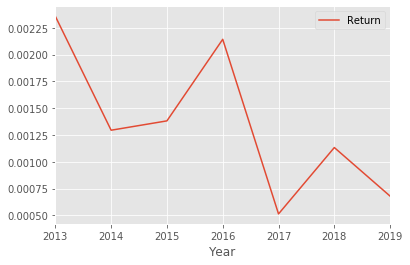

In [98]:
# 日內波動度分析
NI225.loc[Year_mask,['Year','Return']].groupby('Year').var().plot()

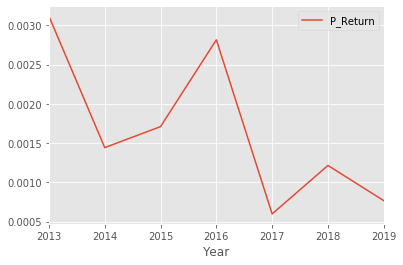

In [107]:
# 日內波動度分析
NI225.loc[Year_mask,['Year','P_Return']].groupby('Year').var().plot()

Text(0.5, 1.0, 'NI225 scatter plots of 8')

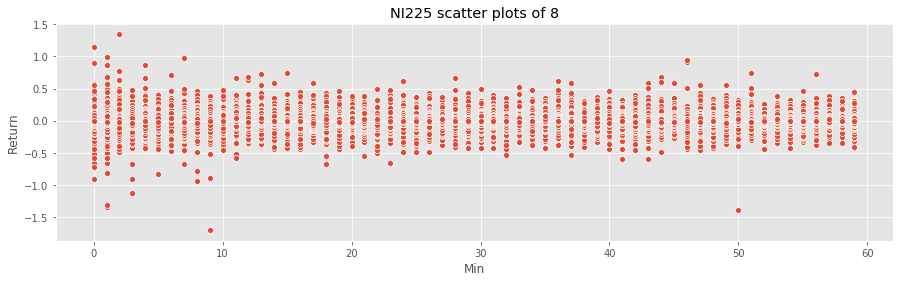

In [112]:
# Stock distribution_day_chage
plt.figure(figsize = (15,4))
sns.scatterplot(x=NI225.loc[(NI225['Hour'] == 8),'Min'], \
                           y=NI225['Return'])
plt.title('NI225 scatter plots of 8')

Text(0.5, 1.0, 'NI225 scatter plots of 7')

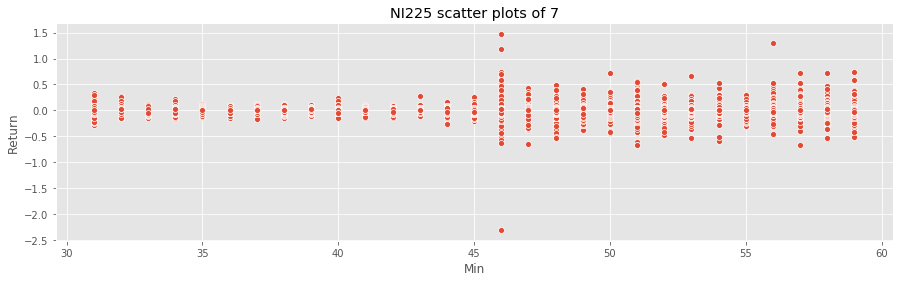

In [114]:
# Stock distribution_day_chage
plt.figure(figsize = (15,4))
sns.scatterplot(x=NI225.loc[(NI225['Hour'] == 7),'Min'], \
                           y=NI225['Return'])
plt.title('NI225 scatter plots of 7')

Text(0.5, 1.0, 'NI225 scatter plots of 0800')

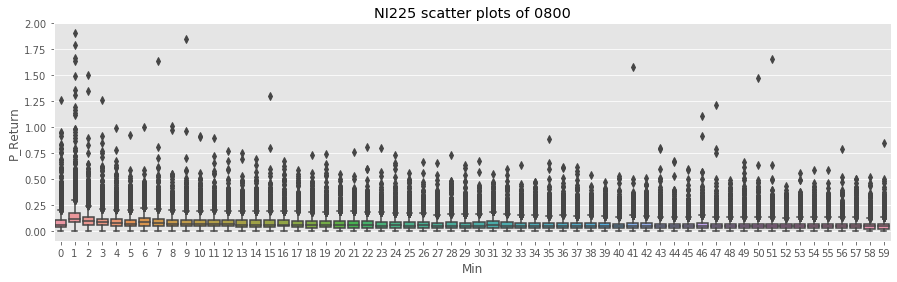

In [105]:
# Stock distribution_day_chage
plt.figure(figsize = (15,4))
sns.boxplot(x=NI225.loc[(NI225['Hour'] == 8),'Min'], \
                           y=NI225['P_Return'])
plt.title('NI225 scatter plots of 0800')

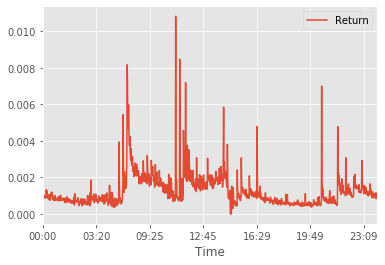

In [17]:
# 日內波動度分析 (Min k)
NI225.loc[Year_mask,['Time','Return']].groupby('Time').var().plot()

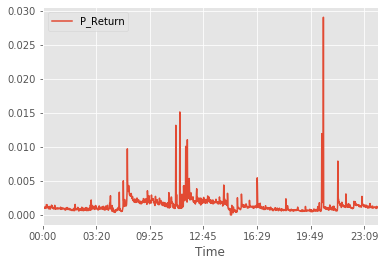

In [18]:
# 日內波動度分析 (Min k)
NI225.loc[Year_mask,['Time','P_Return']].groupby('Time').var().plot()

In [41]:
# Rotate
NI225['Rotate'] = NI225['Rotate'].replace([np.inf, -np.inf], np.nan)
NI225['Rotate'].dropna(how='any',inplace=True)

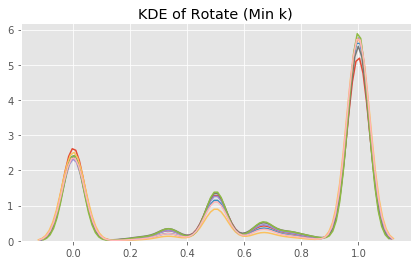

In [44]:
# KDE of Rotate (Min k)
Year_sorted = [2013, 2014, 2015, 2016, 2017, 2018, 2019]
plt.figure(figsize=(7,4))
for i in range(len(Year_sorted)):
    sns.kdeplot(NI225.loc[(NI225['Year'] == Year_sorted[i]) 
                                      ,'Rotate'],label = str(Year_sorted[i]),kernel='gau')
plt.title('KDE of Rotate (Min k)')
plt.legend().remove()
plt.show()

In [19]:
NI225.loc[Year_mask,['Up_down', 'Close', 'Open']][:10]

,Up_down,Close,Open
1235341,1,10405.0,10400.0
1235342,1,10405.0,10400.0
1235343,-1,10410.0,10410.0
1235344,-1,10410.0,10410.0
1235345,1,10415.0,10410.0
1235346,-1,10410.0,10410.0
1235347,-1,10400.0,10400.0
1235348,1,10400.0,10395.0
1235349,-1,10400.0,10400.0
1235350,-1,10395.0,10400.0


In [6]:
# Calculate consecutive ups and downs
# ref:https://codereview.stackexchange.com/questions/138550/count-consecutive-ones-in-a-binary-list
def Go_up_num(Series):
    positive_list = []
    longest = 0
    current = 0
    for i in Series:
        if i == 1:
            current += 1
        else:
            longest = max(longest, current)
            positive_list.append(longest)
            current = 0
    return positive_list

def Go_down_num(Series):
    negative_list = []
    longest = 0
    current = 0
    for i in Series:
        if i == -1:
            current += 1
        else:
            longest = max(longest, current)
            negative_list.append(longest)
            current = 0
    return negative_list

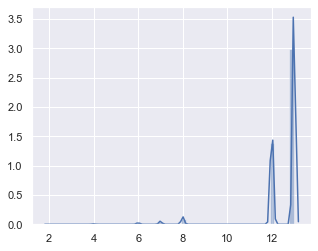

In [9]:
sns.set(rc={'figure.figsize':(5,4)})
sns.distplot(Go_up_num(NI225.loc[Year_mask,'Up_down']))

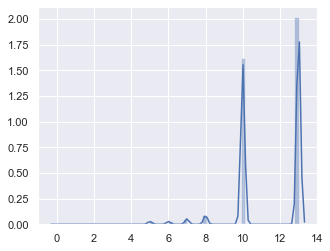

In [22]:
sns.set(rc={'figure.figsize':(5,4)})
sns.distplot(Go_down_num(NI225.loc[Year_mask,'Up_down']))

### Hour k

In [24]:
# from min k to hour k
import os
import pandas as pd
import datetime

stock = NI225.set_index('Date')
period_stock_data = pd.DataFrame()
period_stock_data['open_hour'] = stock.groupby([stock.index,'Hour'])['Open'].first()
period_stock_data['close_hour'] = stock.groupby([stock.index,'Hour'])['Close'].first()
period_stock_data['high_hour'] = stock.groupby([stock.index,'Hour'])['High'].max()
period_stock_data['low_hour'] = stock.groupby([stock.index,'Hour'])['Low'].min()
period_stock_data['volume_hour'] = stock.groupby([stock.index,'Hour'])['Volume'].sum()
period_stock_data['range_hour'] = period_stock_data['high_hour'] - period_stock_data['low_hour']
period_stock_data['diff_hour'] = period_stock_data['close_hour'] - period_stock_data['open_hour']
period_stock_data['rotate_hour'] = abs(period_stock_data['diff_hour']) / period_stock_data['range_hour']
period_stock_data['up_down_hour'] = period_stock_data['diff_hour'].map(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))
period_stock_data['return_hour'] = ((period_stock_data['close_hour'] -  \
                                     period_stock_data['open_hour']) / period_stock_data['open_hour']) *100
period_stock_data['P_return_hour'] = ((period_stock_data['high_hour'] -  \
                                     period_stock_data['low_hour']) / period_stock_data['low_hour']) *100
period_stock_data.dropna(how='any',inplace=True)
period_stock_data.reset_index(inplace=True)
period_stock_data['Year'] = period_stock_data['Date'].map(lambda x: x.year)
period_stock_data.head()

,Date,Hour,open_hour,close_hour,high_hour,low_hour,volume_hour,range_hour,diff_hour,rotate_hour,up_down_hour,return_hour,P_return_hour,Year
0,2003-07-01,15,9275.0,9270.0,9275.0,9260.0,832,15.0,-5.0,0.333333,-1,-0.053908,0.161987,2003
1,2003-07-01,16,9270.0,9270.0,9270.0,9245.0,1189,25.0,0.0,0.000000,0,0.000000,0.270416,2003
2,2003-07-01,17,9250.0,9250.0,9255.0,9250.0,673,5.0,0.0,0.000000,0,0.000000,0.054054,2003
3,2003-07-01,18,9255.0,9250.0,9260.0,9240.0,887,20.0,-5.0,0.250000,-1,-0.054025,0.216450,2003
4,2003-07-01,19,9250.0,9245.0,9250.0,9245.0,11,5.0,-5.0,1.000000,-1,-0.054054,0.054083,2003


In [27]:
period_stock_data.shape

(65944, 14)

In [26]:
Year_mask_p = period_stock_data['Year'] >= 2013

In [49]:
# Rotate(Hour)
period_stock_data['rotate_hour'] = period_stock_data['rotate_hour'].replace([np.inf, -np.inf], np.nan)
period_stock_data['rotate_hour'].dropna(how='any',inplace=True)

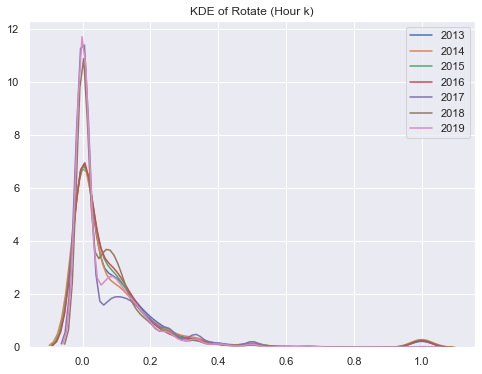

In [50]:
# KDE of Rotate (Hour k)
Year_sorted = [2013, 2014, 2015, 2016, 2017, 2018, 2019]
plt.figure(figsize=(8,6))
for i in range(len(Year_sorted)):
    sns.kdeplot(period_stock_data.loc[(period_stock_data['Year'] == Year_sorted[i]) \
                                      ,'rotate_hour'],label = str(Year_sorted[i]),kernel='gau')
plt.title('KDE of Rotate (Hour k)')
plt.legend()
plt.show()

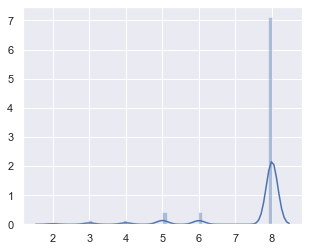

In [27]:
sns.distplot(Go_up_num(period_stock_data.loc[Year_mask_p,'up_down_hour']))

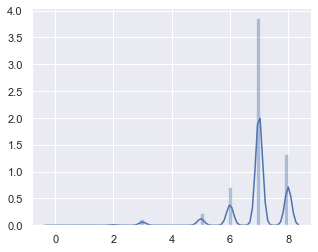

In [28]:
sns.distplot(Go_down_num(period_stock_data.loc[Year_mask_p,'up_down_hour']))

In [60]:
# Growth rate_hour_change
stock = pd.DataFrame({'Date':period_stock_data.Date,'Close_change': period_stock_data.close_hour})
stock = stock.set_index('Date')
stock_change = stock.apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.
stock_change['Hour'] = pd.DataFrame(period_stock_data.iloc[:, [0,1]]).set_index('Date')
stock_change['Year'] = pd.DataFrame(period_stock_data.iloc[:, [0,-1]]).set_index('Date')
stock_change['Hour'] = stock_change['Hour'].astype(int)
stock_change = stock_change.sort_values(by=['Year','Hour'])
Year_mask_s = stock_change['Year'] >= 2013
stock_change = stock_change[Year_mask_s]
stock_change.head()

,Close_change,Hour,Year
Date,,,
2013-01-01,0.000000,0,2013
2013-01-03,-0.002316,0,2013
2013-01-04,-0.000466,0,2013
2013-01-05,-0.000466,0,2013
2013-01-08,0.000944,0,2013


Text(0.5, 1.0, 'NI225 scatter plots')

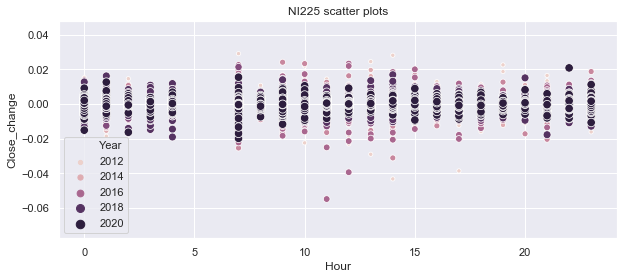

In [61]:
# Stock distribution_day_chage
plt.figure(figsize = (10,4))
sns.scatterplot(x=stock_change['Hour'], y=stock_change['Close_change']\
                ,size=stock_change.Year,hue = stock_change.Year)
plt.title('NI225 scatter plots')

Text(0.5, 1.0, 'NI225 hour_return scatter plots')

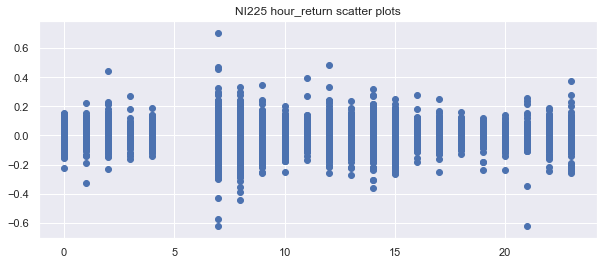

In [62]:
# Stock distribution_day_chage
plt.figure(figsize = (10,4))
plt.scatter(period_stock_data.loc[Year_mask_p,'Hour'], period_stock_data.loc[Year_mask_p,'return_hour'])
plt.title('NI225 hour_return scatter plots')

Text(0.5, 1.0, 'NI225 hour_return_Positive scatter plots')

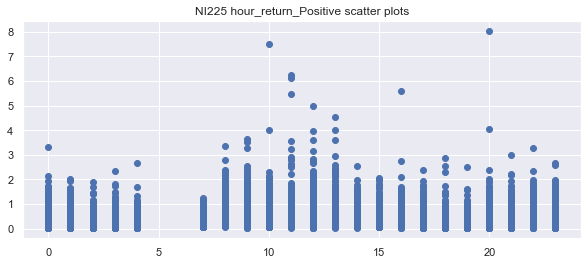

In [63]:
# Stock distribution_day_chage
fig, ax = plt.subplots(figsize = (10,4))
plt.scatter(period_stock_data.loc[Year_mask_p,'Hour'], period_stock_data.loc[Year_mask_p,'P_return_hour'])
plt.title('NI225 hour_return_Positive scatter plots')

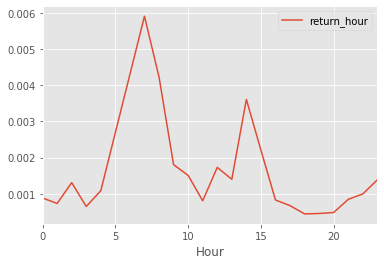

In [13]:
# 日內波動度分析
period_stock_data.loc[Year_mask_p,['Hour','return_hour']].groupby('Hour').var().plot()

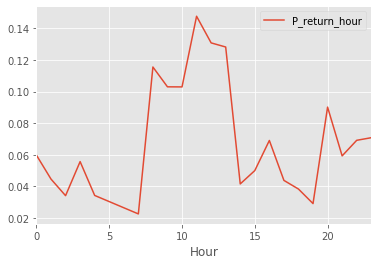

In [14]:
# 日內波動度分析
period_stock_data.loc[Year_mask_p,['Hour','P_return_hour']].groupby('Hour').var().plot()

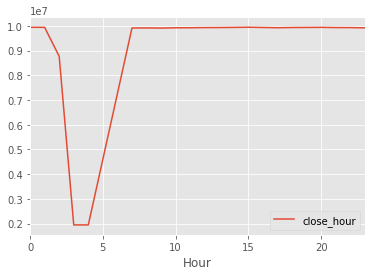

In [68]:
# 日內波動度分析
period_stock_data.loc[Year_mask_p,['Hour','close_hour']].groupby('Hour').var().plot()

###  15Min k

In [37]:
# Combine Date and time
NI225['Date_Time'] = pd.to_datetime(NI225['Date'].map(lambda x: str(x)) + ' ' + NI225['Time'])

In [45]:
# from min k to 15 min k
stock = NI225.set_index('Date_Time')
period_type = '15T'
period_stock_data = stock.resample(period_type,how='last')
period_stock_data['open_15t'] = stock['Open'].resample(period_type,how='first')
period_stock_data['close_15t'] = stock['Close'].resample(period_type,how='last')
period_stock_data['high_15t'] = stock['High'].resample(period_type,how='max')
period_stock_data['low_15t'] = stock['Low'].resample(period_type,how='min')
period_stock_data['volume_15t'] = stock['Volume'].resample(period_type,how='sum')
period_stock_data['range_15t'] = period_stock_data['high_15t'] - period_stock_data['low_15t']
period_stock_data['diff_15t'] = period_stock_data['close_15t'] - period_stock_data['open_15t']
period_stock_data['rotate_15t'] = abs(period_stock_data['range_15t']) / period_stock_data['diff_15t']
period_stock_data['up_down_15t'] = period_stock_data['diff_15t'].map(lambda x: 1 if x >0 else -1)
period_stock_data['return_15t'] = ((period_stock_data['close_15t'] -  \
                                     period_stock_data['open_15t']) / period_stock_data['open_15t']) *100
period_stock_data['P_return_15t'] = ((period_stock_data['high_15t'] -  \
                                     period_stock_data['low_15t']) / period_stock_data['low_15t']) *100
period_stock_data.dropna(how='any',inplace=True)
period_stock_data.reset_index(inplace=True)
period_stock_data.head()

,Date_Time,Date,Time,Open,High,Low,Close,Volume,Year,Month,...,close_15t,high_15t,low_15t,volume_15t,range_15t,diff_15t,rotate_15t,up_down_15t,return_15t,P_return_15t
0,2003-07-01 15:30:00,2003-07-01,15:43,9275.0,9275.0,9270.0,9275.0,51.0,2003.0,7.0,...,9275.0,9275.0,9260.0,589,15.0,0.0,inf,-1,0.000000,0.161987
1,2003-07-01 15:45:00,2003-07-01,15:59,9270.0,9270.0,9270.0,9270.0,114.0,2003.0,7.0,...,9270.0,9275.0,9270.0,243,5.0,-5.0,-1.00,-1,-0.053908,0.053937
2,2003-07-01 16:00:00,2003-07-01,16:14,9250.0,9250.0,9250.0,9250.0,13.0,2003.0,7.0,...,9250.0,9270.0,9245.0,609,25.0,-20.0,-1.25,-1,-0.215750,0.270416
3,2003-07-01 16:15:00,2003-07-01,16:28,9255.0,9255.0,9255.0,9255.0,1.0,2003.0,7.0,...,9255.0,9255.0,9245.0,99,10.0,5.0,2.00,1,0.054054,0.108167
4,2003-07-01 16:45:00,2003-07-01,16:59,9255.0,9255.0,9255.0,9255.0,27.0,2003.0,7.0,...,9255.0,9260.0,9245.0,332,15.0,0.0,inf,-1,0.000000,0.162250


In [48]:
Year_mask_p = period_stock_data['Year'] >= 2013

Text(0.5, 1.0, 'NI225 15t_return scatter plots')

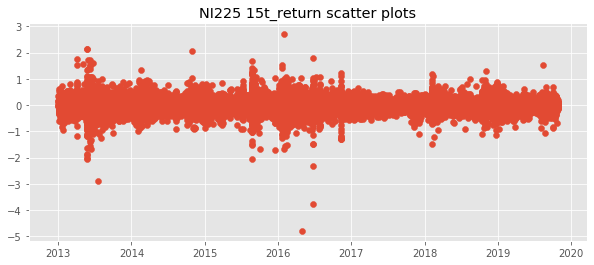

In [49]:
# Stock distribution_day_chage
plt.figure(figsize = (10,4))
plt.scatter(period_stock_data.loc[Year_mask_p,'Date_Time'], period_stock_data.loc[Year_mask_p,'return_15t'])
plt.title('NI225 15t_return scatter plots')

Text(0.5, 1.0, 'NI225 15t_P_return scatter plots')

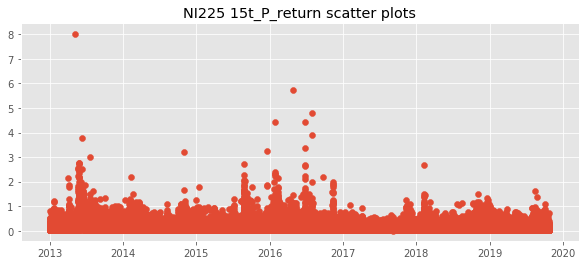

In [50]:
# Stock distribution_day_chage
plt.figure(figsize = (10,4))
plt.scatter(period_stock_data.loc[Year_mask_p,'Date_Time'], period_stock_data.loc[Year_mask_p,'P_return_15t'])
plt.title('NI225 15t_P_return scatter plots')

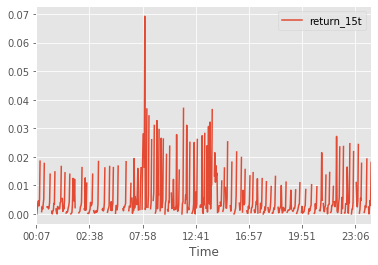

In [61]:
# 日內波動度分析 (15 Min)
period_stock_data.loc[Year_mask_p,['Time','return_15t']].groupby('Time').var().plot()

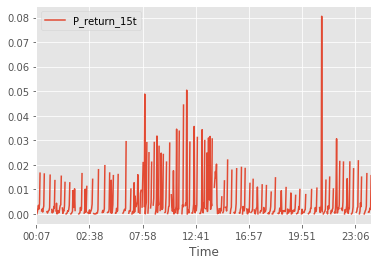

In [64]:
# 日內波動度分析 (15 Min)
period_stock_data.loc[Year_mask_p,['Time','P_return_15t']].groupby('Time').var().plot()

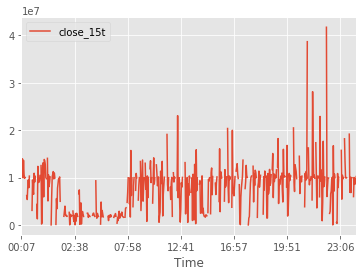

In [59]:
# 日內波動度分析 (15 Min)
period_stock_data.loc[Year_mask_p,['Time','close_15t']].groupby('Time').var().plot()

### 5min k

In [80]:
# from min k to 5 min k
stock = NI225.set_index('Date_Time')
period_type = '5T'
period_stock_data = stock.resample(period_type,how='last')
period_stock_data['open_5t'] = stock['Open'].resample(period_type,how='first')
period_stock_data['close_5t'] = stock['Close'].resample(period_type,how='last')
period_stock_data['high_5t'] = stock['High'].resample(period_type,how='max')
period_stock_data['low_5t'] = stock['Low'].resample(period_type,how='min')
period_stock_data['volume_5t'] = stock['Volume'].resample(period_type,how='sum')
period_stock_data['range_5t'] = period_stock_data['high_5t'] - period_stock_data['low_5t']
period_stock_data['diff_5t'] = period_stock_data['close_5t'] - period_stock_data['open_5t']
period_stock_data['rotate_5t'] = abs(period_stock_data['range_5t']) / period_stock_data['diff_5t']
period_stock_data['up_down_5t'] = period_stock_data['diff_5t'].map(lambda x: 1 if x >0 else -1)
period_stock_data['return_5t'] = ((period_stock_data['close_5t'] -  \
                                     period_stock_data['open_5t']) / period_stock_data['open_5t']) *100
period_stock_data['P_return_5t'] = ((period_stock_data['high_5t'] -  \
                                     period_stock_data['low_5t']) / period_stock_data['low_5t']) *100
period_stock_data.dropna(how='any',inplace=True)
period_stock_data.reset_index(inplace=True)
period_stock_data.head()

,Date_Time,Date,Time,Open,High,Low,Close,Volume,Year,Month,...,close_5t,high_5t,low_5t,volume_5t,range_5t,diff_5t,rotate_5t,up_down_5t,return_5t,P_return_5t
0,2003-07-01 15:30:00,2003-07-01,15:34,9265.0,9265.0,9265.0,9265.0,77.0,2003.0,7.0,...,9265.0,9275.0,9260.0,255,15.0,-10.0,-1.5,-1,-0.107817,0.161987
1,2003-07-01 15:35:00,2003-07-01,15:39,9270.0,9270.0,9265.0,9270.0,60.0,2003.0,7.0,...,9270.0,9270.0,9265.0,137,5.0,5.0,1.0,1,0.053967,0.053967
2,2003-07-01 15:40:00,2003-07-01,15:43,9275.0,9275.0,9270.0,9275.0,51.0,2003.0,7.0,...,9275.0,9275.0,9270.0,197,5.0,5.0,1.0,1,0.053937,0.053937
3,2003-07-01 15:45:00,2003-07-01,15:47,9275.0,9275.0,9275.0,9275.0,20.0,2003.0,7.0,...,9275.0,9275.0,9270.0,84,5.0,0.0,inf,-1,0.000000,0.053937
4,2003-07-01 16:00:00,2003-07-01,16:03,9265.0,9265.0,9265.0,9265.0,64.0,2003.0,7.0,...,9265.0,9270.0,9265.0,151,5.0,-5.0,-1.0,-1,-0.053937,0.053967


In [81]:
Year_mask_p = period_stock_data['Year'] >= 2013

Text(0.5, 1.0, 'NI225 5t_return scatter plots')

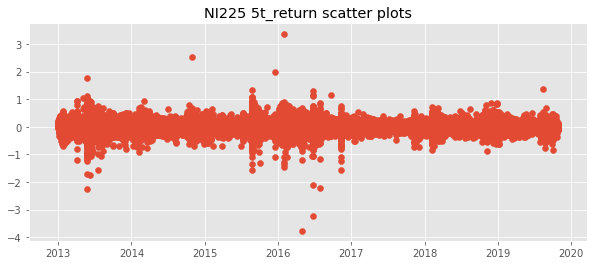

In [82]:
# Stock distribution_day_chage
plt.figure(figsize = (10,4))
plt.scatter(period_stock_data.loc[Year_mask_p,'Date_Time'], period_stock_data.loc[Year_mask_p,'return_5t'])
plt.title('NI225 5t_return scatter plots')

Text(0.5, 1.0, 'NI225 5t_P_return scatter plots')

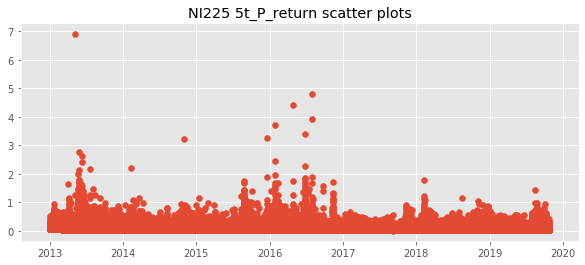

In [83]:
# Stock distribution_day_chage
plt.figure(figsize = (10,4))
plt.scatter(period_stock_data.loc[Year_mask_p,'Date_Time'], period_stock_data.loc[Year_mask_p,'P_return_5t'])
plt.title('NI225 5t_P_return scatter plots')

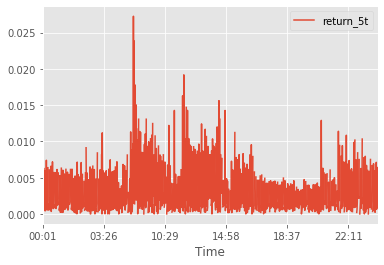

In [122]:
# 日內波動度分析 (5 Min)
period_stock_data.loc[Year_mask_p,['Time','return_5t']].groupby('Time').var().plot()

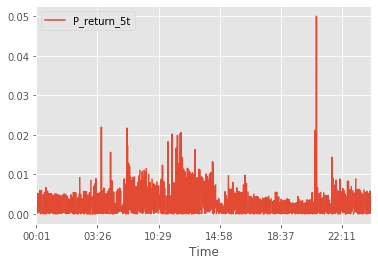

In [85]:
# 日內波動度分析 (5 Min)
period_stock_data.loc[Year_mask_p,['Time','P_return_5t']].groupby('Time').var().plot()

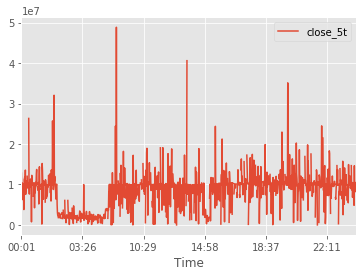

In [86]:
# 日內波動度分析 (5 Min)
period_stock_data.loc[Year_mask_p,['Time','close_5t']].groupby('Time').var().plot()

### 30min k

In [71]:
# from min k to 30 min k
stock = NI225.set_index('Date_Time')
period_type = '30T'
period_stock_data = stock.resample(period_type,how='last')
period_stock_data['open_30t'] = stock['Open'].resample(period_type,how='first')
period_stock_data['close_30t'] = stock['Close'].resample(period_type,how='last')
period_stock_data['high_30t'] = stock['High'].resample(period_type,how='max')
period_stock_data['low_30t'] = stock['Low'].resample(period_type,how='min')
period_stock_data['volume_30t'] = stock['Volume'].resample(period_type,how='sum')
period_stock_data['range_30t'] = period_stock_data['high_30t'] - period_stock_data['low_30t']
period_stock_data['diff_30t'] = period_stock_data['close_30t'] - period_stock_data['open_30t']
period_stock_data['rotate_30t'] = abs(period_stock_data['range_30t']) / period_stock_data['diff_30t']
period_stock_data['up_down_30t'] = period_stock_data['diff_30t'].map(lambda x: 1 if x >0 else -1)
period_stock_data['return_30t'] = ((period_stock_data['close_30t'] -  \
                                     period_stock_data['open_30t']) / period_stock_data['open_30t']) *100
period_stock_data['P_return_30t'] = ((period_stock_data['high_30t'] -  \
                                     period_stock_data['low_30t']) / period_stock_data['low_30t']) *100
period_stock_data.dropna(how='any',inplace=True)
period_stock_data.reset_index(inplace=True)
period_stock_data.head()

,Date_Time,Date,Time,Open,High,Low,Close,Volume,Year,Month,...,close_30t,high_30t,low_30t,volume_30t,range_30t,diff_30t,rotate_30t,up_down_30t,return_30t,P_return_30t
0,2003-07-01 15:30:00,2003-07-01,15:59,9270.0,9270.0,9270.0,9270.0,114.0,2003.0,7.0,...,9270.0,9275.0,9260.0,832,15.0,-5.0,-3.000000,-1,-0.053908,0.161987
1,2003-07-01 16:00:00,2003-07-01,16:28,9255.0,9255.0,9255.0,9255.0,1.0,2003.0,7.0,...,9255.0,9270.0,9245.0,708,25.0,-15.0,-1.666667,-1,-0.161812,0.270416
2,2003-07-01 16:30:00,2003-07-01,16:59,9255.0,9255.0,9255.0,9255.0,27.0,2003.0,7.0,...,9255.0,9260.0,9245.0,481,15.0,5.0,3.000000,1,0.054054,0.162250
3,2003-07-01 17:00:00,2003-07-01,17:23,9255.0,9255.0,9255.0,9255.0,60.0,2003.0,7.0,...,9255.0,9255.0,9250.0,376,5.0,5.0,1.000000,1,0.054054,0.054054
4,2003-07-01 17:30:00,2003-07-01,17:56,9250.0,9250.0,9250.0,9250.0,49.0,2003.0,7.0,...,9250.0,9255.0,9250.0,297,5.0,-5.0,-1.000000,-1,-0.054025,0.054054


In [72]:
Year_mask_p = period_stock_data['Year'] >= 2013

Text(0.5, 1.0, 'NI225 30t_return scatter plots')

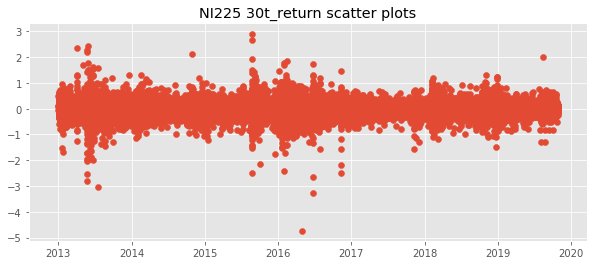

In [73]:
# Stock distribution_day_chage
plt.figure(figsize = (10,4))
plt.scatter(period_stock_data.loc[Year_mask_p,'Date_Time'], period_stock_data.loc[Year_mask_p,'return_30t'])
plt.title('NI225 30t_return scatter plots')

Text(0.5, 1.0, 'NI225 30t_P_return scatter plots')

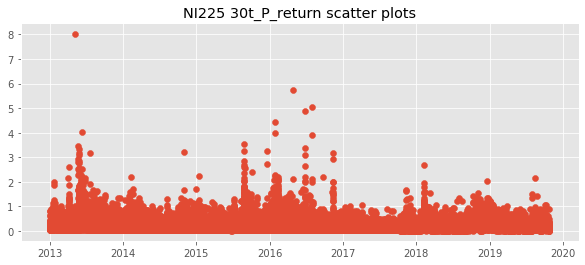

In [74]:
# Stock distribution_day_chage
plt.figure(figsize = (10,4))
plt.scatter(period_stock_data.loc[Year_mask_p,'Date_Time'], period_stock_data.loc[Year_mask_p,'P_return_30t'])
plt.title('NI225 30t_P_return scatter plots')

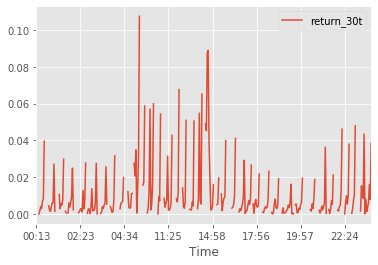

In [76]:
# 日內波動度分析 (30 Min)
period_stock_data.loc[Year_mask_p,['Time','return_30t']].groupby('Time').var().plot()

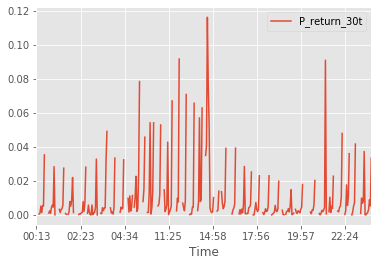

In [75]:
# 日內波動度分析 (30 Min)
period_stock_data.loc[Year_mask_p,['Time','P_return_30t']].groupby('Time').var().plot()

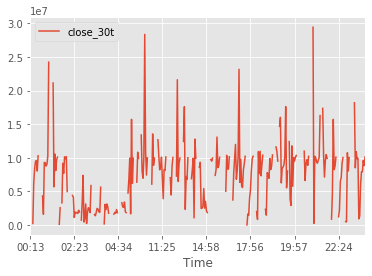

In [77]:
# 日內波動度分析 (30 Min)
period_stock_data.loc[Year_mask_p,['Time','close_30t']].groupby('Time').var().plot()

### Day k

In [123]:
# from min k to day k
stock = NI225.set_index('Date')
period_type = 'D'
period_stock_data = stock.resample(period_type,how='last')
period_stock_data['open_day'] = stock['Open'].resample(period_type,how='first')
period_stock_data['close_day'] = stock['Close'].resample(period_type,how='last')
period_stock_data['high_day'] = stock['High'].resample(period_type,how='max')
period_stock_data['low_day'] = stock['Low'].resample(period_type,how='min')
period_stock_data['volume_day'] = stock['Volume'].resample(period_type,how='sum')
period_stock_data['range_day'] = period_stock_data['high_day'] - period_stock_data['low_day']
period_stock_data['diff_day'] = period_stock_data['close_day'] - period_stock_data['open_day']
period_stock_data['rotate_day'] = abs(period_stock_data['range_day']) / period_stock_data['diff_day']
period_stock_data['up_down_day'] = period_stock_data['diff_day'].map(lambda x: 1 if x >0 else -1)
period_stock_data['return_day'] = ((period_stock_data['close_day'] -  \
                                     period_stock_data['open_day']) / period_stock_data['open_day']) *100
period_stock_data['P_return_day'] = ((period_stock_data['high_day'] -  \
                                     period_stock_data['low_day']) / period_stock_data['low_day']) *100
period_stock_data.dropna(how='any',inplace=True)
period_stock_data.reset_index(inplace=True)
period_stock_data.head()

,Date,Time,Open,High,Low,Close,Volume,Year,Month,Range,...,close_day,high_day,low_day,volume_day,range_day,diff_day,rotate_day,up_down_day,return_day,P_return_day
0,2003-07-01,19:00,9250.0,9250.0,9245.0,9245.0,11.0,2003.0,7.0,5.0,...,9245.0,9275.0,9240.0,3592,35.0,-30.0,-1.166667,-1,-0.323450,0.378788
1,2003-07-02,19:00,9560.0,9560.0,9560.0,9560.0,4.0,2003.0,7.0,0.0,...,9560.0,9590.0,9550.0,4959,40.0,-25.0,-1.600000,-1,-0.260824,0.418848
2,2003-07-03,19:00,9535.0,9540.0,9535.0,9540.0,43.0,2003.0,7.0,5.0,...,9540.0,9580.0,9535.0,4506,45.0,-25.0,-1.800000,-1,-0.261370,0.471945
3,2003-07-04,19:00,9570.0,9570.0,9570.0,9570.0,14.0,2003.0,7.0,0.0,...,9570.0,9590.0,9570.0,1255,20.0,-10.0,-2.000000,-1,-0.104384,0.208986
4,2003-07-07,19:00,9845.0,9845.0,9840.0,9840.0,5.0,2003.0,7.0,5.0,...,9840.0,9875.0,9815.0,3842,60.0,25.0,2.400000,1,0.254712,0.611309


In [124]:
# Rotate (Day)
period_stock_data['rotate_day'] = period_stock_data['rotate_day'].replace([np.inf, -np.inf], np.nan)
period_stock_data['rotate_day'].dropna(how='any',inplace=True)

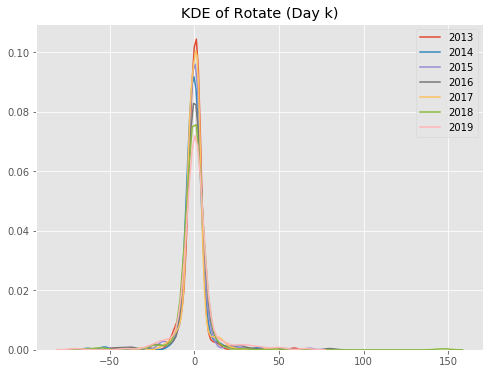

In [126]:
# KDE of Rotate (Day k)
Year_sorted = [2013, 2014, 2015, 2016, 2017, 2018, 2019]
plt.figure(figsize=(8,6))
for i in range(len(Year_sorted)):
    sns.kdeplot(period_stock_data.loc[(period_stock_data['Year'] == Year_sorted[i])\
                                      ,'rotate_day'],label = str(Year_sorted[i]),kernel='gau')
plt.title('KDE of Rotate (Day k)')
plt.legend()
plt.show()

In [58]:
# Over Yesterday
s = pd.Series(period_stock_data.index)
c = []
d = []
for i in period_stock_data.index:
    if i != 1806:
        c.append(period_stock_data.loc[i+1, 'open_day'] > period_stock_data.loc[i, 'close_day'])
        d.append(period_stock_data.loc[i+1, 'open_day'] < period_stock_data.loc[i, 'close_day'])
    else:
        break
print("Over yesterday high:%.2f"% ((sum(c)/2441)*100) + "%")
print("Over yesterday low:%.2f"% ((sum(d)/2441)*100) + "%")

Over yesterday high:36.95%
Over yesterday low:28.76%


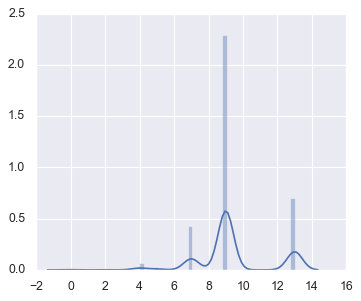

In [59]:
sns.distplot(Go_up_num(period_stock_data['up_down_day']))

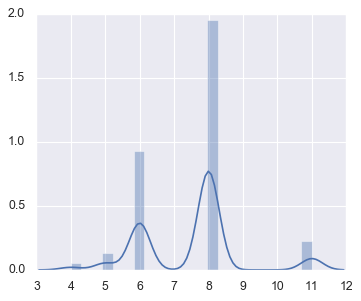

In [60]:
sns.distplot(Go_down_num(period_stock_data['up_down_day']))

### MACD

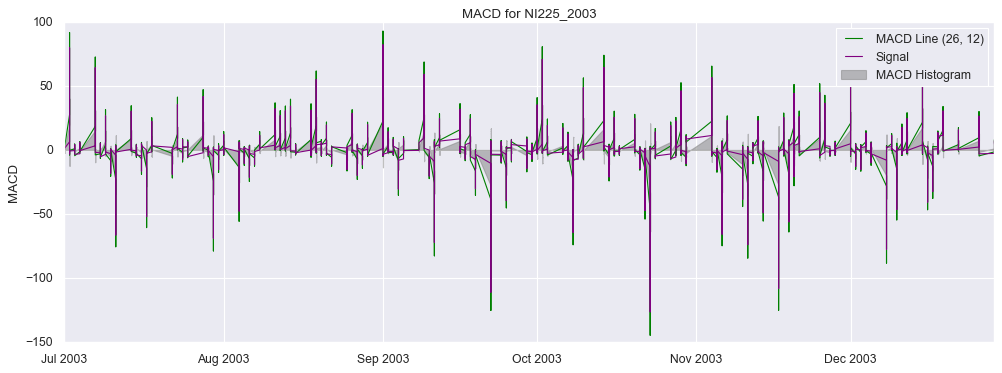

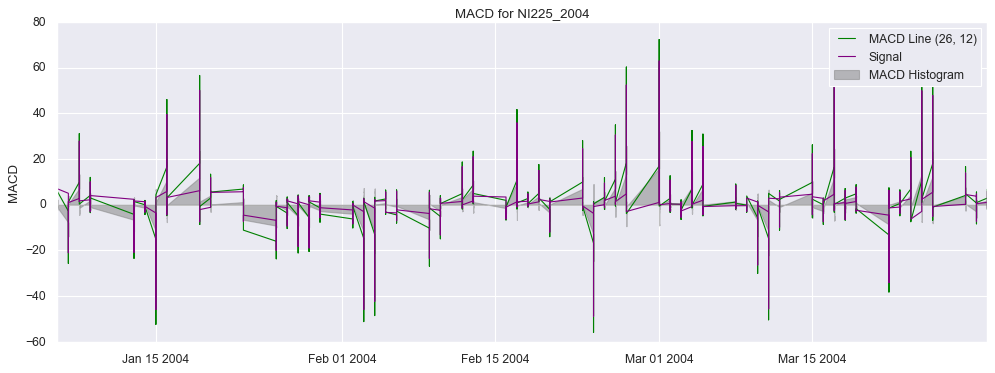

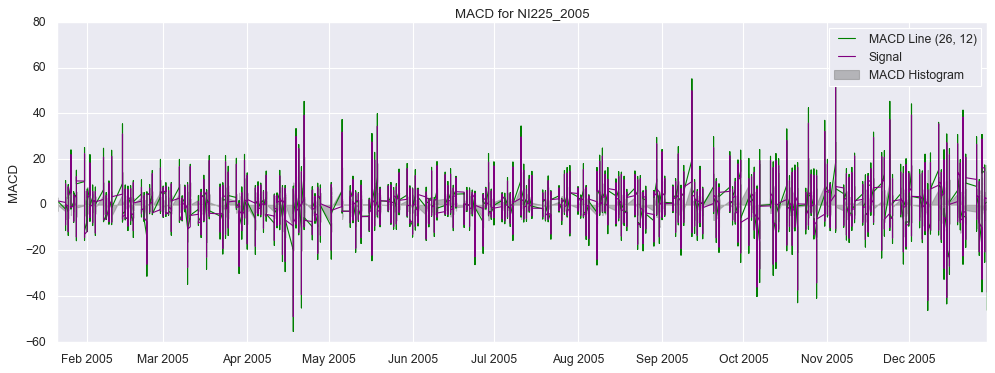

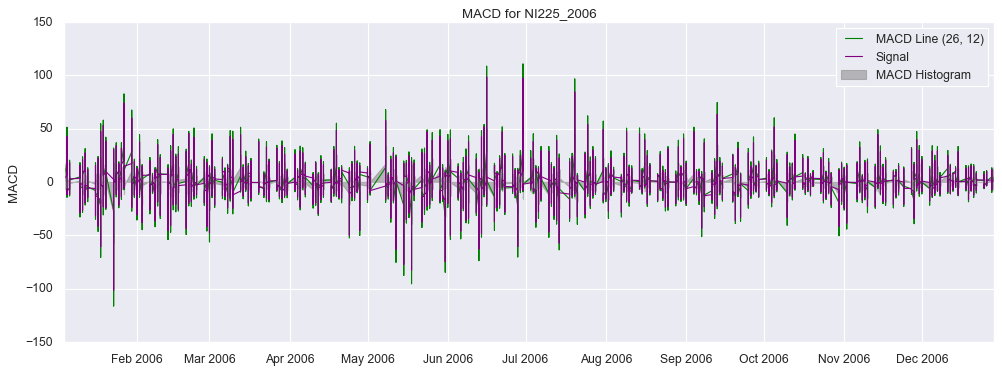

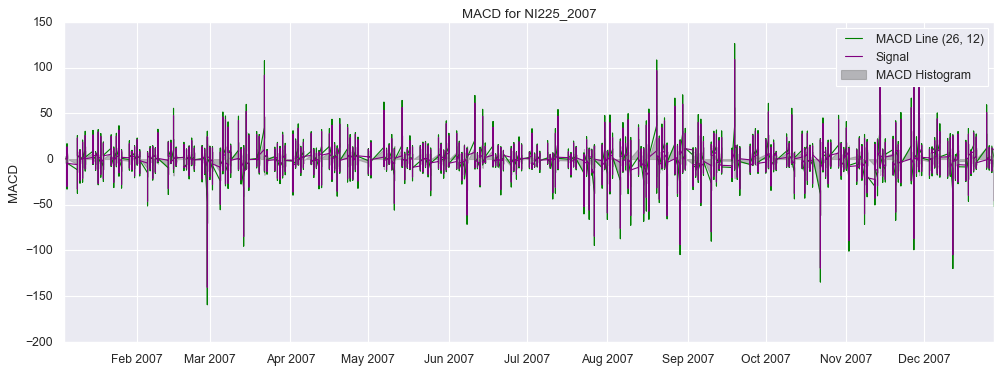

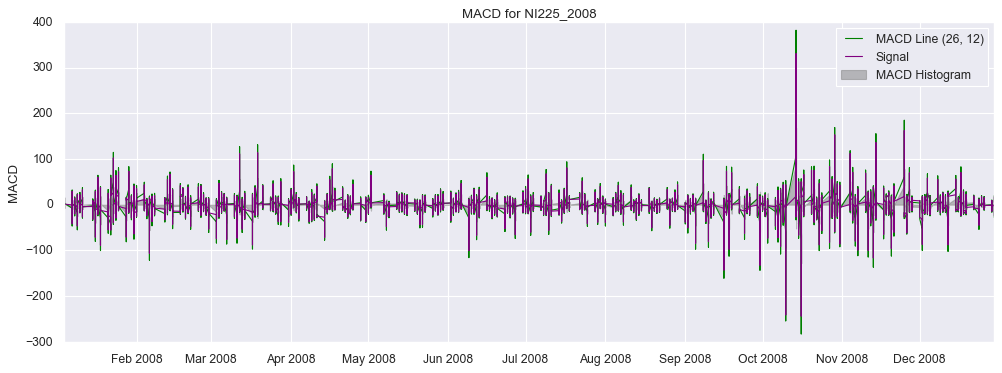

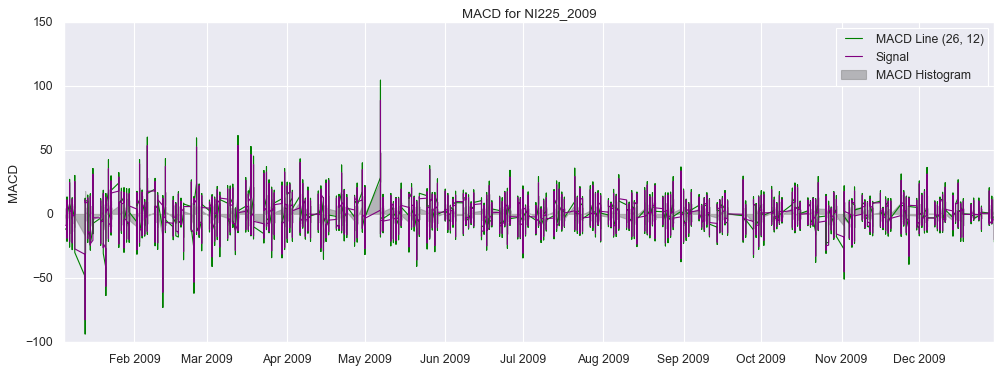

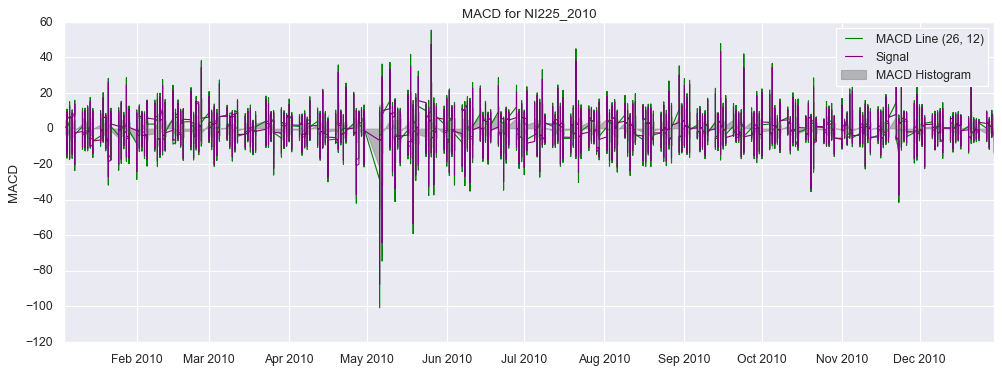

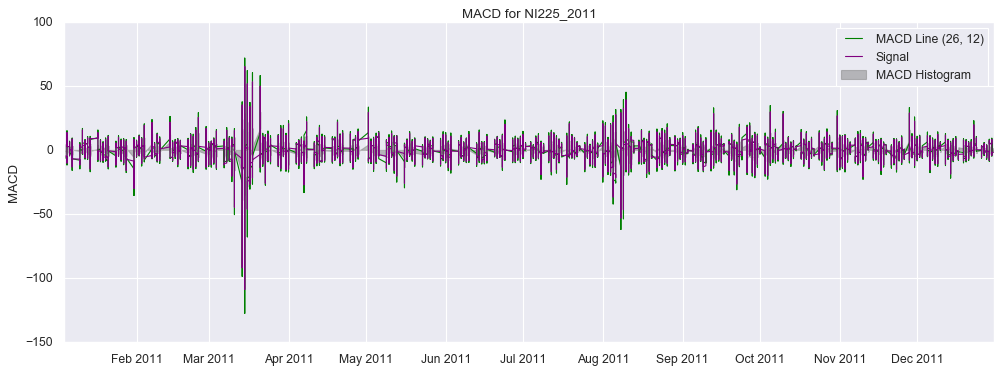

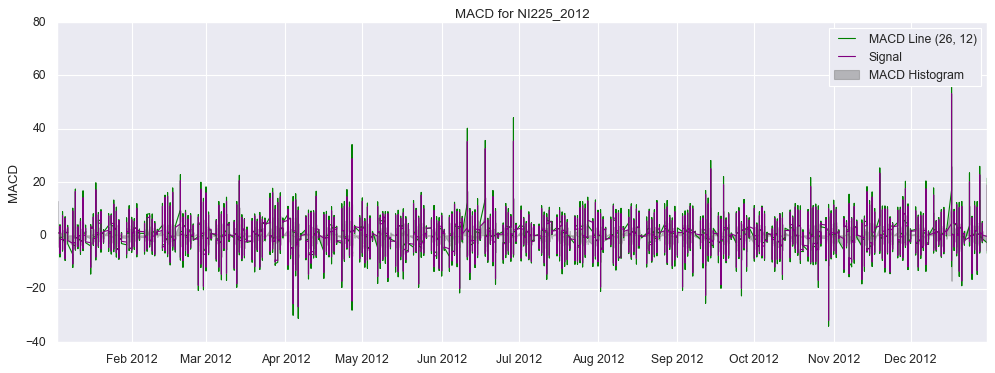

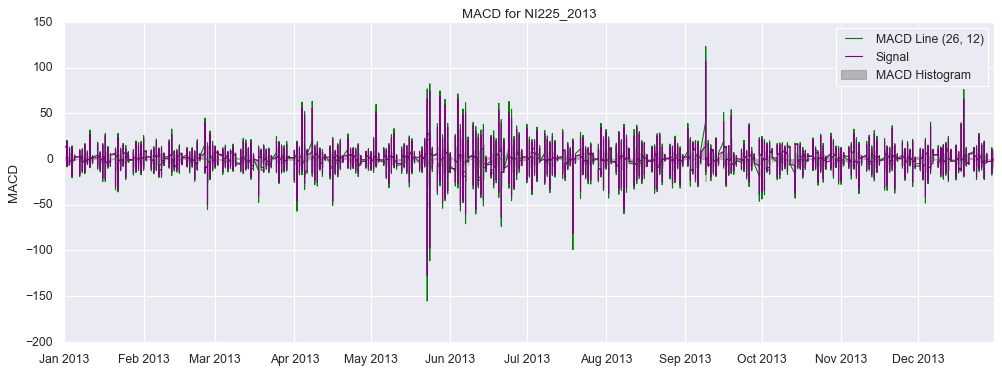

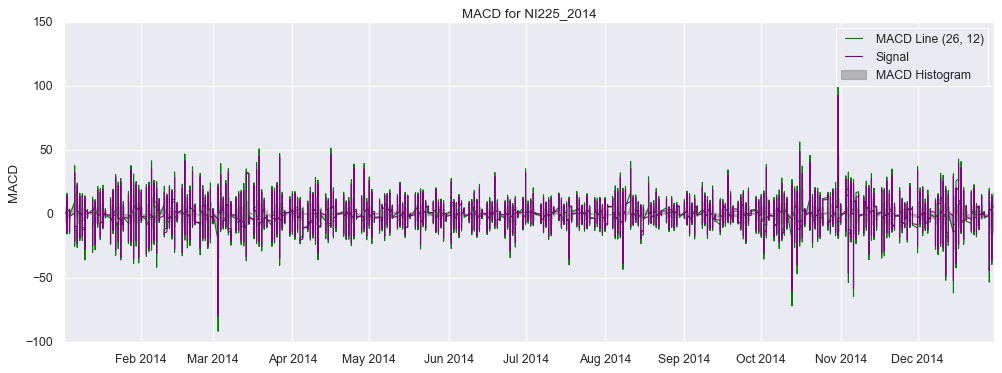

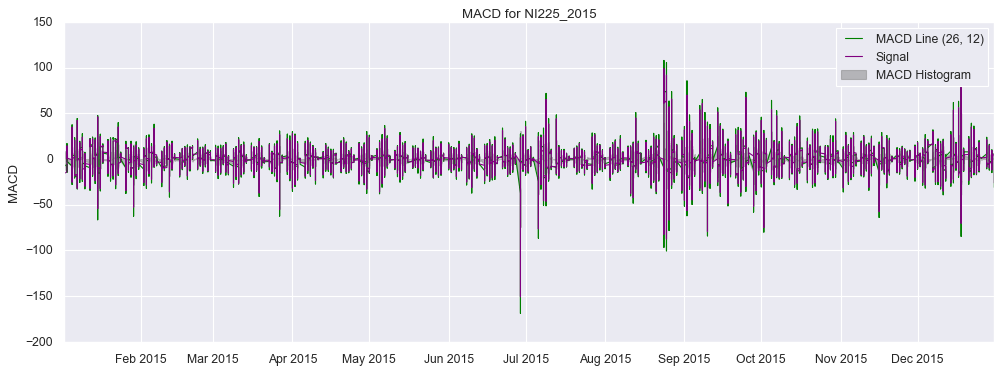

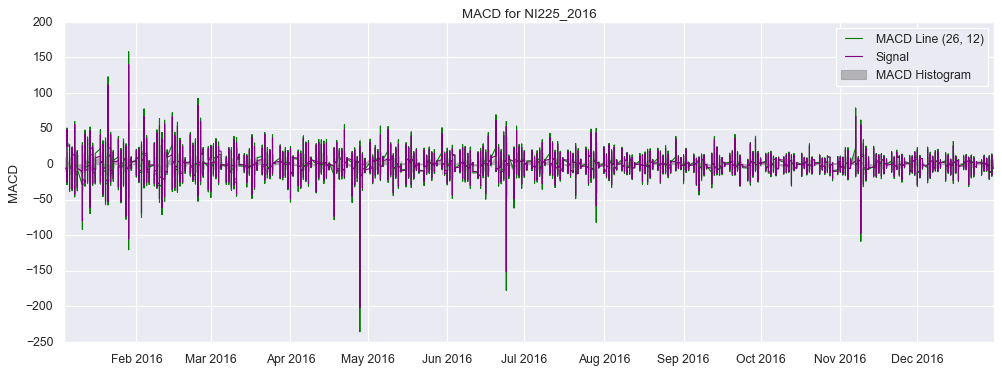

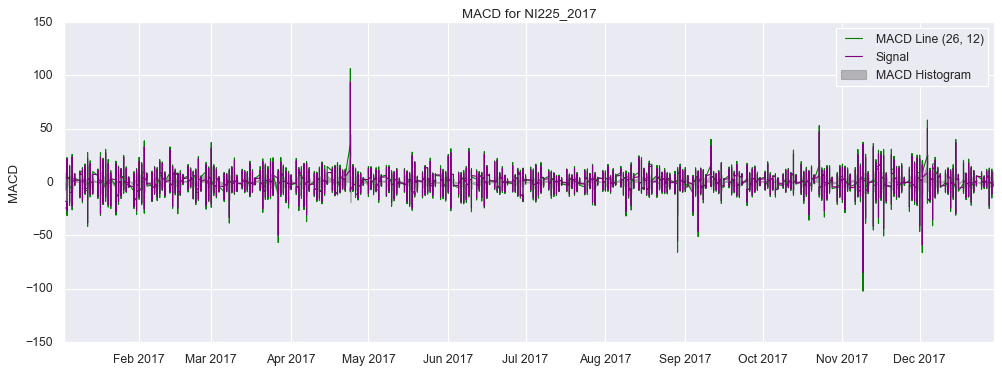

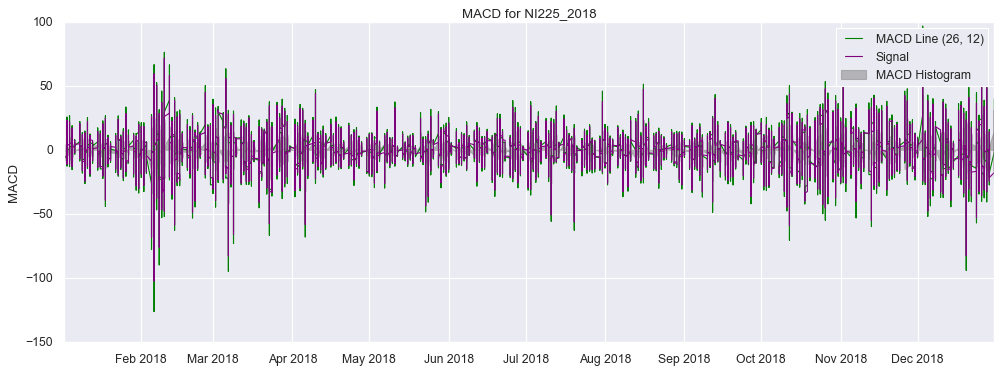

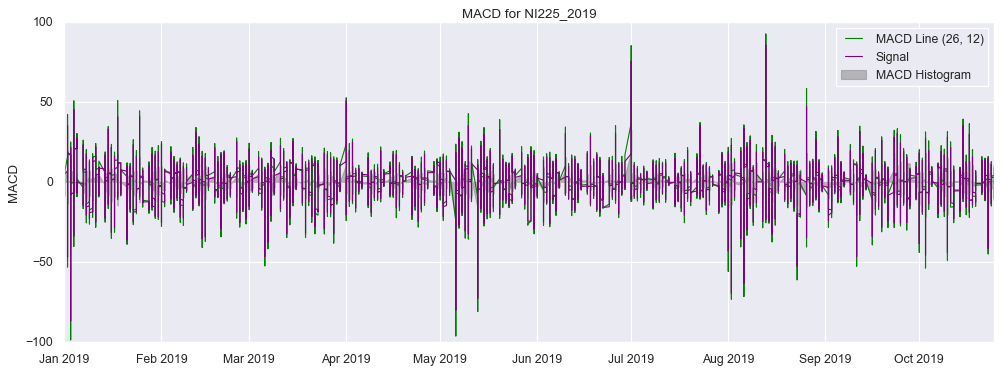

In [96]:
for i in range(len(Year_sorted)):
    exp1 = NI225.loc[(NI225['Year'] == 2003 + i), 'Close'].ewm(span=12, adjust=False).mean()
    exp2 = NI225.loc[(NI225['Year'] == 2003 + i), 'Close'].ewm(span=26, adjust=False).mean()
    macd = exp1-exp2
    exp3 = macd.ewm(span=9, adjust=False).mean()
    figure = 'f%i'%(i+1)
    ax = 'ax%i'%(i+1)
    figure, ax = plt.subplots(figsize=(15,5))
    ax.plot(NI225.loc[(NI225['Year'] == 2003 + i), 'Date'], macd, color='green', lw=1, label='MACD Line (26, 12)')
    ax.plot(NI225.loc[(NI225['Year'] == 2003 + i), 'Date'], exp3, color='purple', lw=1, label='Signal')
    ax.fill_between(NI225.loc[(NI225['Year'] == 2003 + i), 'Date'],\
                    macd - exp3, color='gray', alpha=0.5, label='MACD Histogram')
    ax.set(title='MACD for NI225_%i'%(2003 + i), ylabel='MACD')
    ax.legend(loc='upper right')